# Problem Statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading Data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


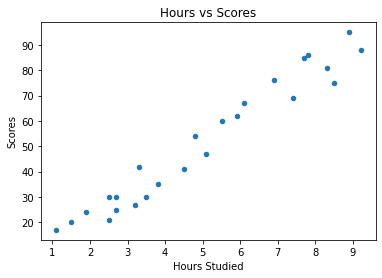

In [4]:
#Distribution of data
data.plot(x='Hours', y='Scores', kind='scatter')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

From the graph above, it is clear that there is a positive linear relation between the study hours and the scores.

## Train Test Split

In [5]:
X=data.iloc[:, :-1].values.reshape(-1,1)
y=data.iloc[:, 1].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [10]:
regressor.coef_

array([[9.91065648]])

In [11]:
regressor.intercept_

array([2.01816004])

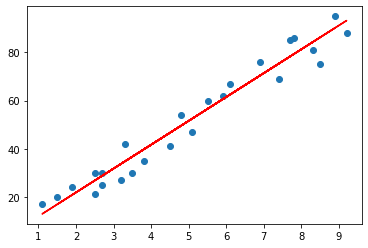

In [12]:
# Regression line
# Y= m*X + constant
regr = regressor.coef_*X + regressor.intercept_
plt.scatter(X,y)
plt.plot(X,regr, color='red')
plt.show()

## Prediction

In [13]:
X_test.shape

(5, 1)

In [14]:
y_pred= regressor.predict(X_test)
y_pred.shape

(5, 1)

In [15]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [16]:
#Predicting data for 9.25 hours
print('Score of student who studied for 9.25 hours a day={}'.format(regressor.predict([[9.25]])))

Score of student who studied for 9.25 hours a day=[[93.69173249]]


## Model Evaluation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [18]:
mean_sq_error = mean_squared_error(y_test, y_pred)
mean_ab_error = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:",mean_sq_error)
print("Mean absolute Error:",mean_ab_error)

Mean Squared Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
